## Analyzing Birth Statistics in California fro Medi Cal Patients
Salma Ibrahim, Dalia Cruz, Lisette Vasquez Perez

## Project Overview

In this project, we aim to design and implement a modular, reusable software system for analyzing real-world birth statistics data from California. Our focus is to apply **functional** and **object-oriented programming (OOP)** concepts in building a structured data analysis tool that can load, clean, transform, and visualize key patterns in the dataset.

We will also extract insights that answer meaningful public health questions related to maternal and infant health, while ensuring our code is clean, maintainable, and easy to test.

## 🎯 Goals and Learning Outcomes

- Enhance problem-solving and critical thinking through real-world data exploration.
- Apply **data cleaning**, **missing value handling**, and **data transformation** techniques.
- Perform **exploratory data analysis (EDA)** to identify trends and correlations.
- Utilize **object-oriented programming** to structure analysis tasks into reusable classes.
- Leverage **functional programming** for data transformation.
- Create clear **visualizations** using `pandas`, `matplotlib`, and `seaborn`.
- Design clean, modular code using separation of concerns and reusable components.
- Use **UML diagrams** to communicate program architecture and design.

## 🧾 Dataset Background

- **Dataset**: Medi-Cal Birth Statistics by Select Characteristics  
- **Source**: [data.ca.gov](https://catalog.data.gov/dataset/medi-cal-birth-statistics-by-select-characteristics-and-california-resident-hospital-birth-caf33)
- **Format**: CSV
- **Features include**:
  - Mother's age
  - Mother's healh details
  - Mother's socioeconomical details
  - Birth weight
  - Delivery method
  - Infant health outcomes
  - Insurance type (Medi-Cal vs other)

We chose this dataset because it reflects important real-world issues in maternal and infant health, which can inform healthcare policy, patient outreach, and education.

---

## ❓ Research Questions We Aim to Explore

1. Does maternal age impact birth outcomes (e.g., birth weight)?
2. Is there a difference in outcomes between Medi-Cal and non-Medi-Cal patients?
3. What trends exist over time (e.g., birthrate, birthweight, age of the mother, health trends across different groups)?

---

## 🔧 Planned Implementation Approach

- **Data Cleaning**:
      
  - Remove or impute missing data if applicable
  - Megre appropriate data sets
  - Standardize column names and data types

- **Functional Programming**:
  - Modular design for reusability across different datasets

- **Planned Visualizations**:
  - Line charts of birth weight and maternal age
  - Bar charts for categorical features


---

## 📈 Expected Results and Challenges

We expect to uncover statistically significant relationships between demographic or care-related factors and birth outcomes. Potential challenges include:
- Incomplete or inconsistent data
- Bias in reported metrics (e.g., underreporting)
- Limited documentation


## 📚 References

- Dataset: https://catalog.data.gov/dataset/medi-cal-birth-statistics-by-select-characteristics-and-california-resident-hospital-birth-caf33


In [3]:
## Imports and Setup 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from functools import reduce

In [47]:

# Load datasets
data_dir = "data"

datasets = {
    "ethnicity": pd.read_csv(f"{data_dir}/ca-resident-births-by-cy-payer-maternal-race-ethnicity-and-select-birth-characteristics.csv"),
    "birthweight": pd.read_csv(f"{data_dir}/ca-resident-births-by-cy-payer-birthweight-range-and-select-birth-characteristics.csv"),
    "preterm": pd.read_csv(f"{data_dir}/ca-resident-births-by-cy-payer-very-preterm-status-and-select-birth-characteristics.csv"),
    "gestation": pd.read_csv(f"{data_dir}/ca-resident-births-by-cy-payer-length-of-gestation-and-select-birth-characteristics.csv"),
    "education": pd.read_csv(f"{data_dir}/ca-resident-births-by-cy-payer-method-of-delivery-and-select-birth-characteristics.csv"),
}

# Filter helper
def filter_df(df, grouper=None):
    if grouper:
        df = df[df["Grouper"] == grouper]
    return df
    

# 1. Maternal Age and Ethnicity vs Birth Outcomes
q1_age = filter_df(datasets["birthweight"], grouper="Maternal Age Group")
q1_ethnicity = datasets["ethnicity"]
q1_ethnicity["Maternal Race/Ethnicity"].unique()
"""
['African-American', 'American Indian/Alaska Native','Asian/Pacific Islander', 'Hispanic', 
'Other/Two or More Race Categories/Unknown', 'White']
"""

q1 = pd.merge(q1_age, q1_ethnicity, on=["Calendar Year", "Payer", "Grouper", "Birth Characteristic"], how="outer")
q1 = q1.drop(q1.columns[[ 6, 7]], axis=1)


# 2. Racial Disparities in Birth Outcomes
q2_ethnicity_diabetes = filter_df(datasets["ethnicity"], grouper="Diabetes Status")
q2_ethnicity_hypertension = filter_df(datasets["ethnicity"], grouper="Hypertension Status")
q2_ethnicity_substance_use = filter_df(datasets["ethnicity"], grouper="Substance Use Status")
q2_ethnicity_smoking = filter_df(datasets["ethnicity"], grouper="Smoking Status")

q2_preterm = filter_df(datasets["preterm"], grouper="Maternal Race/Ethnicity")






,Calendar Year,Payer,Maternal Race/Ethnicity,Grouper,Birth Characteristic,Number of Births
9,2007,Medi-Cal,African-American,Substance Use Status,Maternal Non-Substance User,17393
10,2007,Medi-Cal,African-American,Substance Use Status,Maternal Substance User,762
11,2007,Medi-Cal,African-American,Substance Use Status,Unknown Substance Use Status,0
21,2007,Medi-Cal,American Indian/Alaska Native,Substance Use Status,Maternal Non-Substance User,1058
22,2007,Medi-Cal,American Indian/Alaska Native,Substance Use Status,Maternal Substance User,78
...,...,...,...,...,...,...
1858,2019,Non-Medi-Cal,Other/Two or More Race Categories/Unknown,Substance Use Status,Maternal Substance User,279
1859,2019,Non-Medi-Cal,Other/Two or More Race Categories/Unknown,Substance Use Status,Unknown Substance Use Status,2222
1869,2019,Non-Medi-Cal,White,Substance Use Status,Maternal Non-Substance User,79215
1870,2019,Non-Medi-Cal,White,Substance Use Status,Maternal Substance User,949


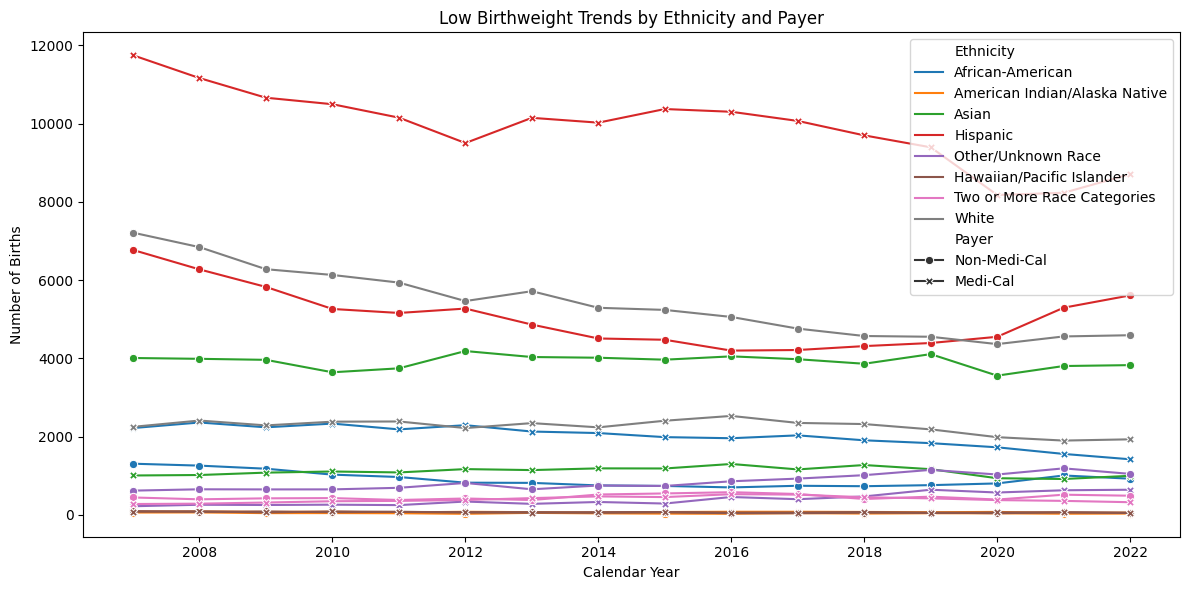

In [48]:
## Use of OOP, Ethnicity class

class Ethnicity:
    def __init__(self, race, df, payer=None):
        self.race = race
        self.payer = payer if payer else "All"
        self.df = df[df["Birth Characteristic"] == race]
        if payer:
            self.df = self.df[self.df["Payer"] == payer]
    
    def total_births_per_year(self):
        return self.df.groupby("Calendar Year")["Number of Births"].sum().reset_index()

    def low_birthweight_per_year(self):
        lb = self.df[self.df["Birthweight Range"] == "Low Birthweight"]
        result = lb.groupby("Calendar Year")["Number of Births"].sum().reset_index()
        result["Ethnicity"] = self.race
        result["Payer"] = self.payer
        return result


    def plot_low_birthweight(self):
        lb_df = self.low_birthweight_per_year()
        sns.lineplot(data=lb_df, x="Calendar Year", y="Number of Births", label=self.race)

## Creating objects for the different ethnicities
ethnicities = ['African-American', 'American Indian/Alaska Native',
       'Asian', 'Hispanic',
       'Other/Unknown Race', 'Hawaiian/Pacific Islander','Two or More Race Categories', 'White']

##Using List Comprehension 
medical_objs = [Ethnicity(name, datasets["birthweight"], payer="Non-Medi-Cal") for name in ethnicities]
non_medical_objs = [Ethnicity(name, datasets["birthweight"], payer="Medi-Cal") for name in ethnicities]

# Gather data from both groups
lb_medi_cal = pd.concat([e.low_birthweight_per_year() for e in medical_objs])
lb_private = pd.concat([e.low_birthweight_per_year() for e in non_medical_objs])
combined_lb = pd.concat([lb_medi_cal, lb_private])

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=combined_lb,
    x="Calendar Year",
    y="Number of Births",
    hue="Ethnicity",
    style="Payer",
    markers=True,
    dashes=False
)
plt.title("Low Birthweight Trends by Ethnicity and Payer")
plt.tight_layout()
plt.show()




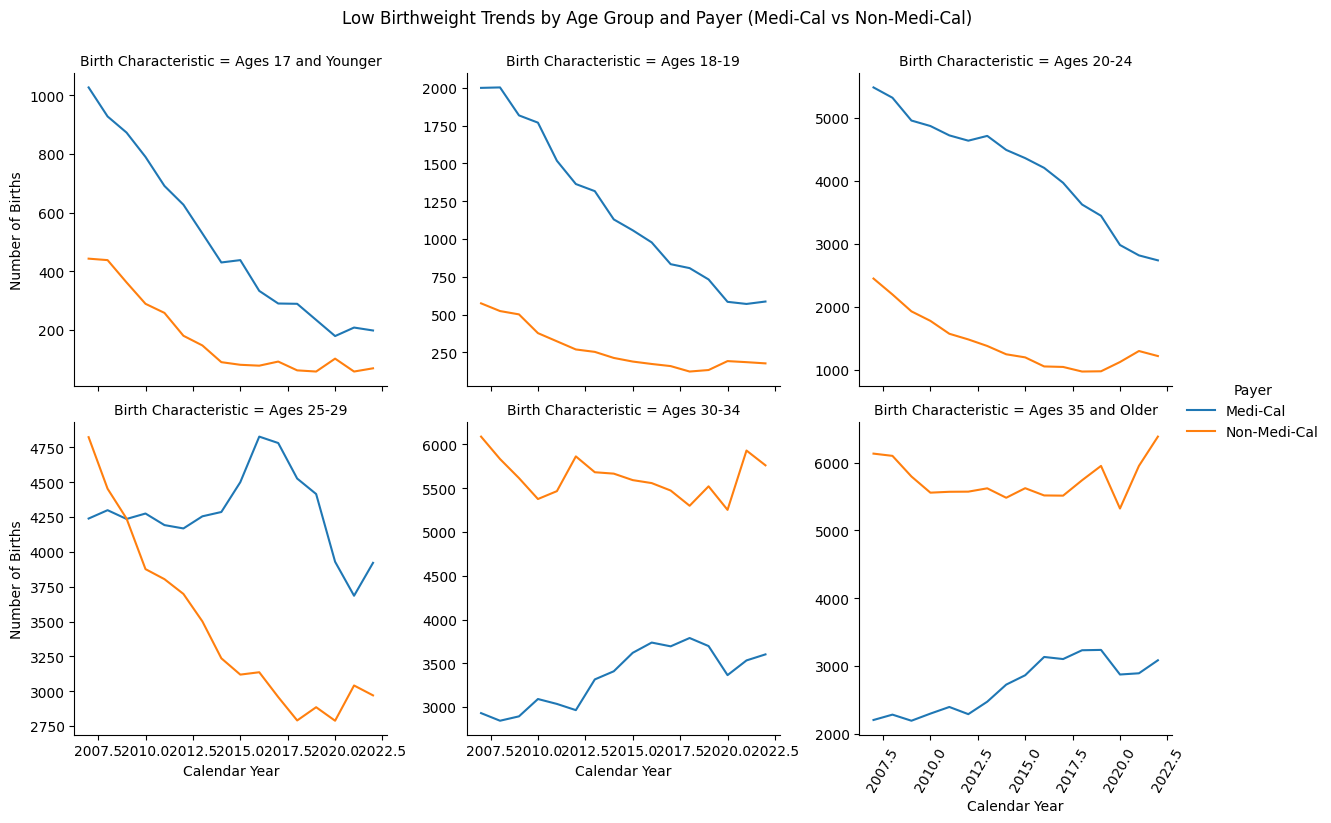

In [56]:
## Cleaning data
q1[(q1["Birth Characteristic"]== "Invalid Age") & (q1["Number of Births" ] >0)]
q1["Birth Characteristic"].unique()
## Getting rid of rows with invalid age since not significant to our findings
valid_ages=['Ages 17 and Younger', 'Ages 18-19', 'Ages 20-24', 'Ages 25-29', 'Ages 30-34', 'Ages 35 and Older']

lb_age = datasets["birthweight"]
lb_age = lb_age[lb_age["Birthweight Range"] == "Low Birthweight"]
lb_age = lb_age[lb_age["Birth Characteristic"].isin(valid_ages)]
lb_age_grouped = lb_age.groupby(["Calendar Year", "Birth Characteristic", "Payer"])["Number of Births"].sum().reset_index()
# lb_age_grouped = lb_grouped[lb_grouped["Payer"].isin(["Medi-Cal", "Non-Medi-Cal"])]

sns.relplot(
    data=lb_age_grouped,
    x="Calendar Year",
    y="Number of Births",
    hue="Payer",
    kind="line",
    col="Birth Characteristic",
    col_wrap=3,
    height=4,
    facet_kws={'sharey': False}
)

plt.subplots_adjust(top=0.9)
plt.xticks(rotation=60)
plt.suptitle("Low Birthweight Trends by Age Group and Payer (Medi-Cal vs Non-Medi-Cal)")
plt.show()




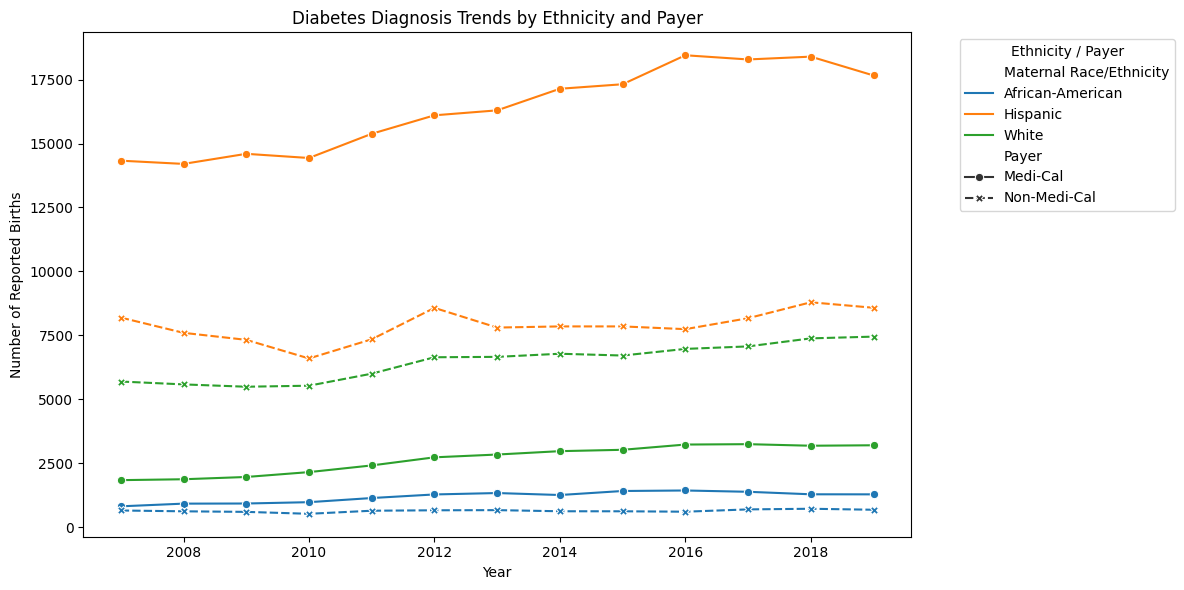

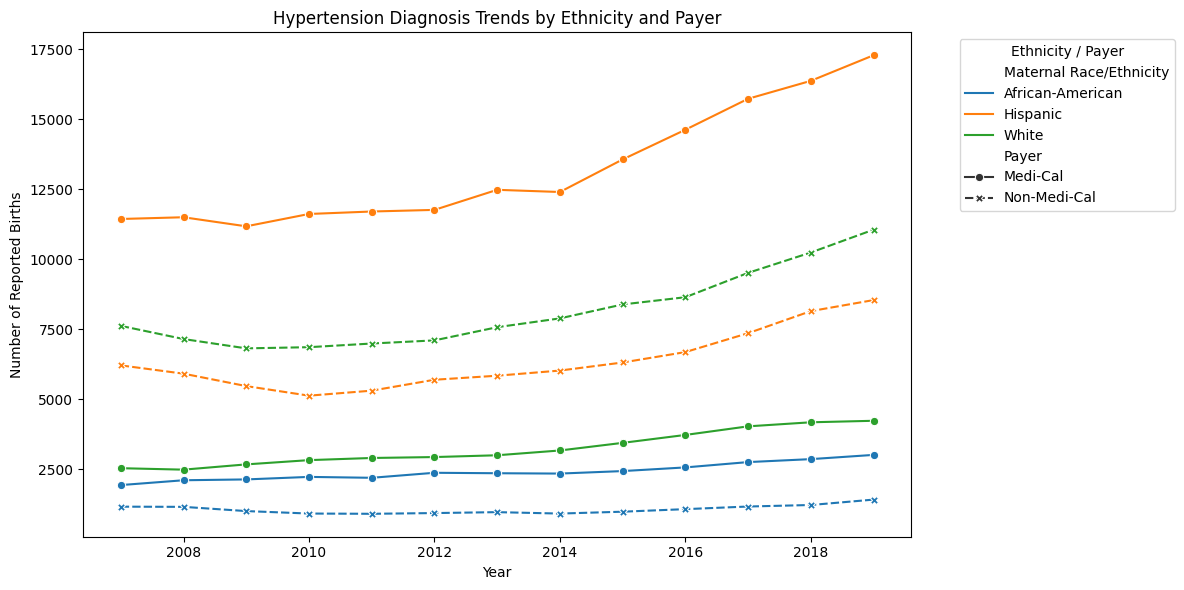

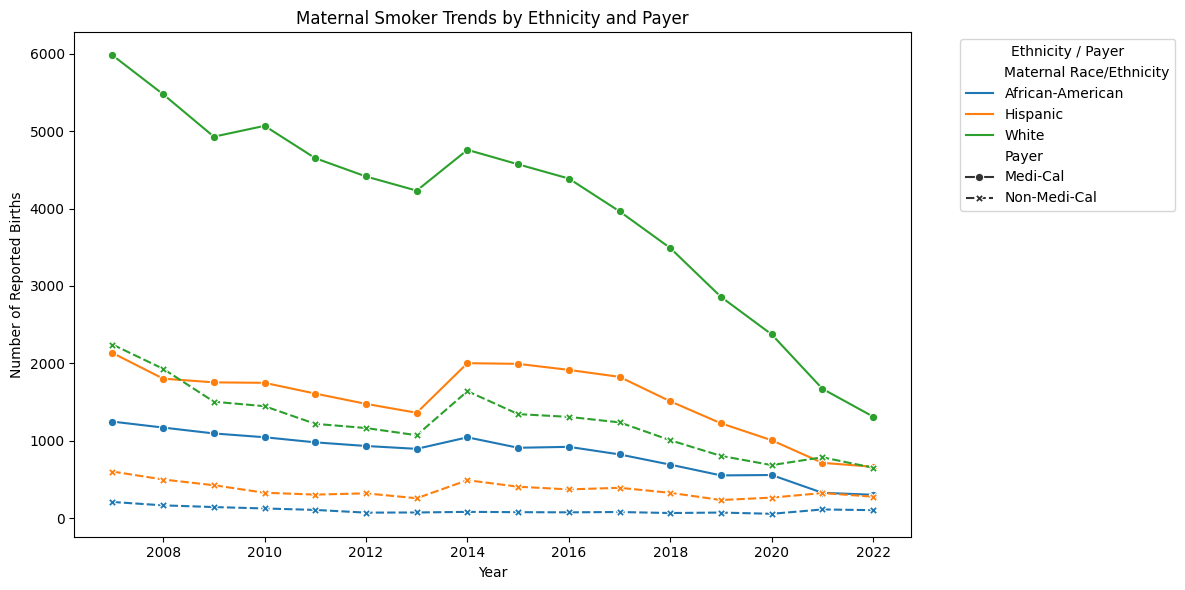

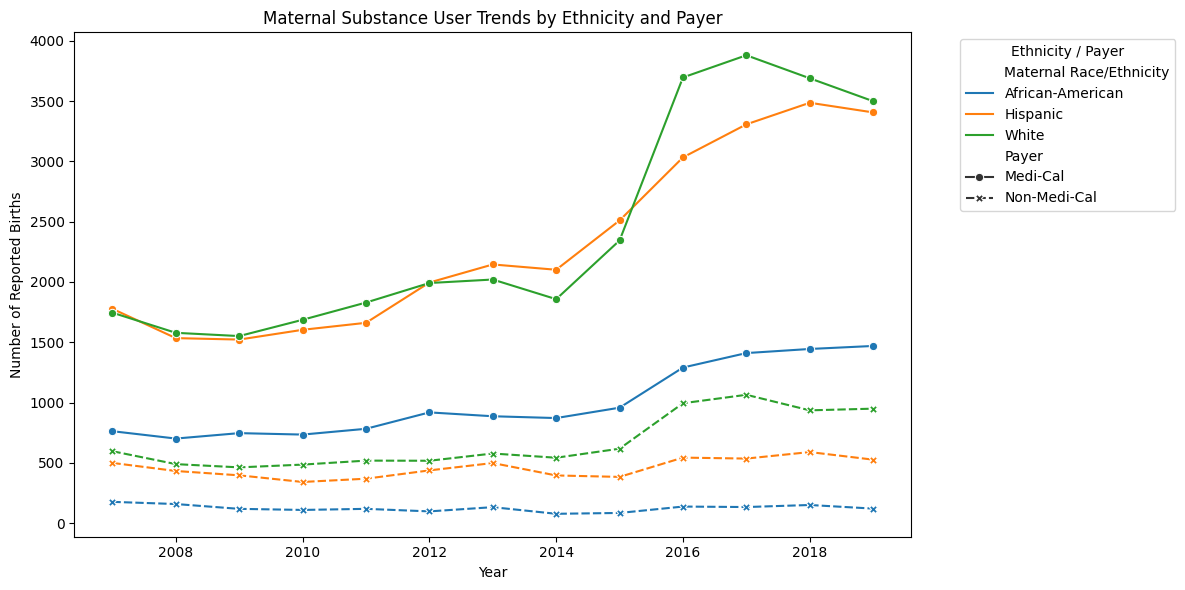

In [67]:
##Different health factors by ethic groups
df = datasets["ethnicity"]

# Inspect to find the relevant values for substance use
df["Birth Characteristic"].unique()
"""
['Diabetes Diagnosis', 'No Diabetes Diagnosis',
       'Unknown Diabetes Status', 'Hypertension Diagnosis',
       'No Hypertension Diagnosis', 'Unknown Hypertension Status',
       'Maternal Non-Smoker', 'Maternal Smoker', 'Unknown Smoking Status',
       'Maternal Non-Substance User', 'Maternal Substance User',
       'Unknown Substance Use Status']
"""
health_conditions = [
    "Diabetes Diagnosis", "Hypertension Diagnosis", 
    "Maternal Smoker", "Maternal Substance User"
]

# Relevant groups only
ethnicities = ['African-American', 'Asian', 'Hispanic', 'White']
payers = ["Medi-Cal", "Non-Medi-Cal"]

# Filter
df_health = df[
    df["Birth Characteristic"].isin(health_conditions) &
    df["Maternal Race/Ethnicity"].isin(ethnicities) &
    df["Payer"].isin(payers)
]

grouped = df_health.groupby([
    "Calendar Year", "Maternal Race/Ethnicity", "Payer", "Birth Characteristic"
])[" Number of Births "].sum().reset_index()
import matplotlib.pyplot as plt
import seaborn as sns

indicators = [
    "Diabetes Diagnosis", 
    "Hypertension Diagnosis", 
    "Maternal Smoker", 
    "Maternal Substance User"
]

for indicator in indicators:
    plt.figure(figsize=(12, 6))
    
    subset = grouped[grouped["Birth Characteristic"] == indicator]
    
    sns.lineplot(
        data=subset,
        x="Calendar Year",
        y=" Number of Births ",
        hue="Maternal Race/Ethnicity",
        style="Payer",
        markers=True,
        dashes=True
    )
    
    plt.title(f"{indicator} Trends by Ethnicity and Payer")
    plt.xlabel("Year")
    plt.ylabel("Number of Reported Births")
    plt.legend(title="Ethnicity / Payer", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


In [ ]:
##Conclusions